In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [5]:
def visualize_optical_flow(video_path):
    cap = cv.VideoCapture(video_path)
    frame_stack = []
    
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        cap.release()
        return

    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

    frame_count = 0
    skip_count = 0
    flow_stack = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        if frame_count % 6 == 0:
            frame_stack.append(gray)

        if len(frame_stack) == 12 :
            stacked_frames = np.stack(frame_stack, axis=-1)
            flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            flow_stack.append(flow)

            # Remove the oldest frame from the stack
            frame_stack.pop(0)

        prev_gray = gray
        frame_count += 1

    cap.release()

    # Calculate the mean optical flow magnitude across all frames
    mean_flow = np.mean(flow_stack, axis=0)
    magnitude, _ = cv.cartToPolar(mean_flow[..., 0], mean_flow[..., 1])

    # Color the optical flow magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    magnitude = cv.applyColorMap(magnitude.astype(np.uint8), cv.COLORMAP_JET)

    # Resize the optical flow magnitude to match the frame size
    magnitude = cv.resize(magnitude, (first_frame.shape[1], first_frame.shape[0]))

    # Create a transparent background
    transparent_bg = np.zeros_like(first_frame)

    # Combine the real image and the optical flow with transparency
    result = cv.addWeighted(first_frame, 0.5, magnitude, 0.5, 0)

    # Display the real image and the optical flow side by side for comparison
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].imshow(cv.cvtColor(first_frame, cv.COLOR_BGR2RGB))
    axs[0].axis('off')
    axs[0].set_title('Spatial Visualization')
    axs[1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    axs[1].axis('off')
    axs[1].set_title('Motion Visualization')
    plt.show()

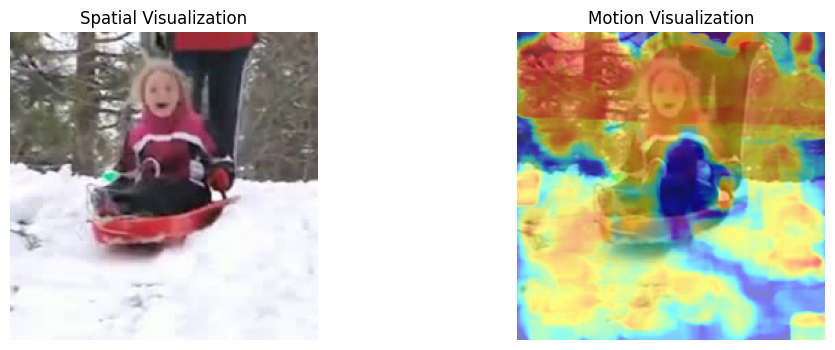

In [6]:
# Call the function with your video path
video_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\videos_processed\0004_processed.mp4"
visualize_optical_flow(video_path)

### Stacked Optical Flow

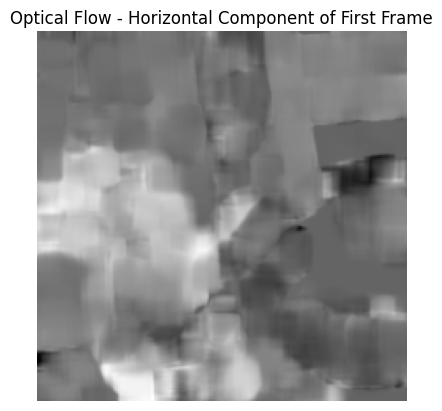

array([[[-2.40745969e-04,  2.08722849e-05, -1.83249731e-02, ...,
         -5.15973334e-05,  1.90839237e-05, -1.07248698e-05],
        [-3.32389900e-04,  5.99574378e-05, -4.07089293e-01, ...,
         -1.24197497e-04,  2.18872519e-05, -9.71415648e-06],
        [-8.48219730e-03,  2.95459013e-03, -1.52170539e+00, ...,
         -7.28812156e-05,  2.62217745e-05, -7.32181661e-06],
        ...,
        [-2.45343852e+00, -5.24892688e-01, -1.13866365e+00, ...,
          3.36573100e+00,  8.03742349e-01,  1.15592933e+00],
        [-2.43491983e+00, -5.18709302e-01, -1.16176939e+00, ...,
          3.39387083e+00,  8.15013885e-01,  1.11538732e+00],
        [-2.33486938e+00, -4.99138445e-01, -1.17770362e+00, ...,
          3.31774592e+00,  8.35503101e-01,  1.04195595e+00]],

       [[-5.63825539e-04,  5.81998720e-05, -4.09258902e-02, ...,
         -4.20759861e-05,  4.58760951e-05,  1.69476898e-05],
        [-7.28727027e-04,  1.59756237e-04, -6.82648659e-01, ...,
         -1.30783053e-04,  4.47628299e

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def visualize_optical_flow(video_path):
    cap = cv.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return
    
    total_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    interval = total_frames // 16  # Calculate the interval for frame selection

    prev_frame = None
    flow_stack = []

    for frame_count in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % interval == 0:
            gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            if prev_frame is not None:
                flow = cv.calcOpticalFlowFarneback(prev_frame, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                # Stacking the optical flow vectors in x and y directions
                flow_stack.append(flow[..., 0])  # Horizontal flow
                flow_stack.append(flow[..., 1])  # Vertical flow
            prev_frame = gray

    cap.release()
    
    if len(flow_stack) < 32:
        print("Not enough frames for optical flow calculation.")
        return

    # Stack the flow vectors to create a multi-channel image
    stacked_flow = np.stack(flow_stack, axis=-1)

    # Visualize the stacked flow (for example, the first channel)
    plt.imshow(stacked_flow[..., 10], cmap='gray')
    plt.title('Optical Flow - Horizontal Component of First Frame')
    plt.axis('off')
    plt.show()

    return stacked_flow
# Call the function with your video path
video_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\videos_processed\0029_processed.mp4"
visualize_optical_flow(video_path)

In [13]:
import numpy as np

def load_and_check_shape(file_path):
    # Load the .npy file
    data = np.load(file_path)

    # Print the shape of the loaded array
    print(f"Shape of the loaded data: {data.shape}")

    return data

# Example usage
file_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\Optical_flow\stacked_img\0800_stackedopticalflow.npy"  # Replace with the path to your .npy file
loaded_data = load_and_check_shape(file_path)

Shape of the loaded data: (224, 224, 32)
